In [ ]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
from scipy import signal
import sys

In [ ]:
def GetRMSE(x2, y2, x1, y1):
    from scipy.spatial.distance import pdist

    er = []
    for idx in range(len(x2)):
        X = np.asarray([[x1[idx], y1[idx]], 
                         [x2[idx], y2[idx]]])
        temp_er = pdist(X,metric = 'euclidean')
        er.append(temp_er[0])
    er = np.asarray(er)
    return(er)

In [3]:
# parameters used to filter data

cutoff = 24

interpol_order = 3 # order for polynomial interpolation

# win_gauss = signal.gaussian(10,3) # gaussian kernal for smoothening interpolated data

# parameters for the savitzky-golay filter
savgol_win = 15
savgol_polyorder = 3

## remove x y location of points based on distance from previous frame threshold 

In [4]:
direc = r"../dataFolders/PaperPipelineOutput/RawTracks/"
visitnum = 'FirstVisit/'
# for visitnum in ['FirstVisit/', 'LastVisit/']:
    
    # get all the data for that visit num
path = os.path.join(direc, visitnum)
trackslist = glob.glob(path + '*.csv')
    
#     new_path = os.path.join(r"../dataFolders/PaperPipelineOutput/FilteredTracks/", visitnum)
#     try:
#         os.mkdir(new_path)
#     except OSError:
#         print('oops')

In [5]:
f = [file for file in trackslist if 'c-10_m11' in file]
f

['../dataFolders/PaperPipelineOutput/RawTracks/FirstVisit\\c-10_m11_visit_0.csv']

In [6]:
circ_parameters_path = glob.glob('../dataFolders/PaperPipelineOutput/CircleParameters/' + '*.csv')
circ_parameters = pd.read_csv(circ_parameters_path[0])

In [ ]:
# visit = 'FirstVisit/'
# direc = os.path.join('../dataFolders/PaperPipelineOutput/FilteredTracks/', visit)
# datalist = glob.glob(direc + '*.csv')

In [ ]:
# newpath = os.path.join('../dataFolders/PaperPipelineOutput/RadiusAndAngle/', visit)
# try:
#     os.mkdir(newpath)
# except OSError:
#     print('oops')

In [8]:
# for path in datalist:

# file = pd.read_csv(path)
name = [n for n in circ_parameters.name if n + '_' in f[0]][0]

# if x.size == 0 or y.size == 0:
#     print(name + 'has emtpy x y tracks')
#     continue

circ_x = circ_parameters.loc[circ_parameters.name == name, 'circ_x'].values
circ_y = circ_parameters.loc[circ_parameters.name == name, 'circ_y'].values
circ_radii = circ_parameters.loc[circ_parameters.name == name, 'circ_radii'].values

In [32]:
# loop through all the moths in the list
# for data in trackslist:
data = f[0]
name = os.path.basename(data)[:-4]
file = pd.read_csv(data)
x = file.x.values
y = file.y.values

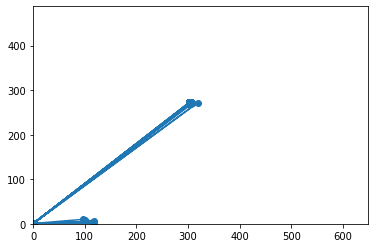

In [34]:
plt.plot(x,y, 'o-')
plt.xlim(0, 648)
plt.ylim(0,488)
plt.show()

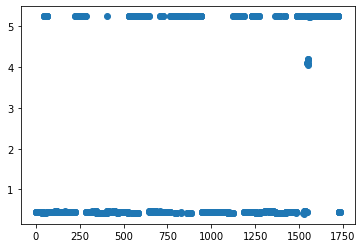

In [22]:
cent_x = x - circ_x
cent_y = y - circ_y

r = np.linalg.norm([cent_x, cent_y], axis = 0)
r = r/circ_radii

plt.plot(r, 'o')

In [23]:
# get rmse values for subsequent frames
rmse = GetRMSE(x[1:], y[1:], x[:-1], y[:-1])

filtered_x = np.copy(x[1:])
filtered_y = np.copy(y[1:])

filtered_x[rmse > cutoff] = np.nan
filtered_y[rmse > cutoff] = np.nan

filtered_x[rmse == np.nan] = np.nan
filtered_y[rmse == np.nan] = np.nan
# new_xypts = pd.DataFrame({'filtered_x': filtered_x, 'filtered_y': filtered_y, 'rmse': rmse})
# new_xypts.to_csv(new_path + '/' + name + '.csv')

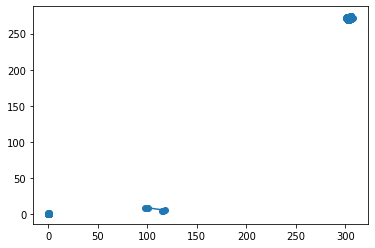

In [24]:
plt.plot(filtered_x, filtered_y, 'o-')

In [25]:
x = pd.Series(filtered_x)
y = pd.Series(filtered_y)

x_interpl = x.interpolate(method='polynomial', order=interpol_order)
y_interpl = y.interpolate(method='polynomial', order=interpol_order)

x_interpl = x_interpl[~np.isnan(x_interpl)]
y_interpl= y_interpl[~np.isnan(y_interpl)]

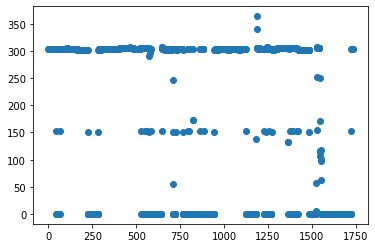

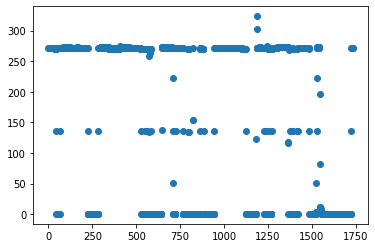

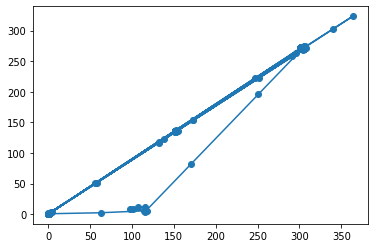

In [27]:
plt.plot(x_interpl, 'o')
plt.show()
plt.plot(y_interpl, 'o')
plt.show()
plt.plot(x_interpl, y_interpl, 'o-')

## Solution 1:  remove effective NaN - (0-5)

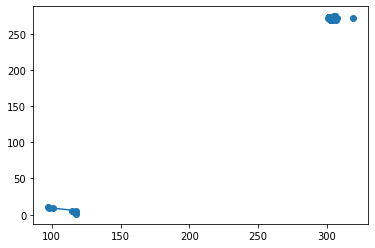

In [35]:
x = file.x.values
y = file.y.values

x_notinView = x <=5
y_notinView = y <=5

x[x_notinView & y_notinView]=np.nan
y[x_notinView & y_notinView]=np.nan

plt.plot(x,y, 'o-')

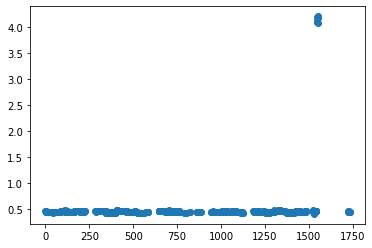

In [36]:
cent_x = x - circ_x
cent_y = y - circ_y

r = np.linalg.norm([cent_x, cent_y], axis = 0)
r = r/circ_radii

plt.plot(r, 'o')

In [37]:
# get rmse values for subsequent frames
rmse = GetRMSE(x[1:], y[1:], x[:-1], y[:-1])

filtered_x = np.copy(x[1:])
filtered_y = np.copy(y[1:])

filtered_x[rmse > cutoff] = np.nan
filtered_y[rmse > cutoff] = np.nan

filtered_x[rmse == np.nan] = np.nan
filtered_y[rmse == np.nan] = np.nan

C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


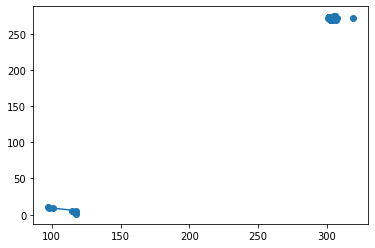

In [38]:
plt.plot(filtered_x, filtered_y, 'o-')

## Possible solution - use DLC likehood and remove points less than 0.4

In [39]:
x = pd.Series(filtered_x)
y = pd.Series(filtered_y)

x_interpl = x.interpolate(method='polynomial', order=interpol_order)
y_interpl = y.interpolate(method='polynomial', order=interpol_order)

x_interpl = x_interpl[~np.isnan(x_interpl)]
y_interpl= y_interpl[~np.isnan(y_interpl)]

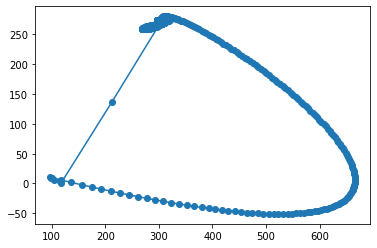

In [41]:
plt.plot(x_interpl, y_interpl, 'o-')

## OHHH FUCK! 
### Should be using 2D interpolation, shouldn't I?

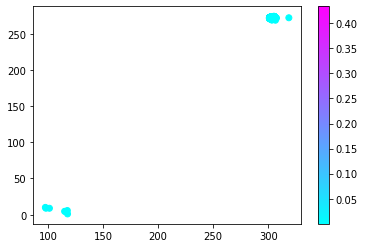

In [44]:
# lets first look at DLC likelihood

# plt.scatter(np.arange(len(filtered_x)),filtered_x, c = file.likelihood[1:], cmap = plt.cm.cool)
# plt.show()

plt.scatter(filtered_x, filtered_y, c = file.likelihood[1:], cmap = plt.cm.cool)
plt.colorbar()

In [47]:
np.median(file[x_notinView & y_notinView].likelihood)

1.3641649729834169e-06

## get angle and magnitude

In [ ]:
def Unitvector(x_gauss, y_gauss):
    from sklearn import preprocessing
    
    # get the slope of the tangent
    trajectory = np.asarray([x_gauss, y_gauss])
    m = np.gradient(trajectory, axis = 1)
    m_atx = m[1]/m[0]
    
    # get the tangent vector at x = x0 + 1
    tangent_x = x_gauss+1
    tangent_y = m_atx + y_gauss
    
    # get the unit tangent vector
    u_x = []
    u_y = []

    for x,y,x0,y0 in zip(tangent_x, tangent_y, x_gauss, y_gauss):
        if np.any(np.isnan([x, y])) or np.any(np.isinf([x, y])):
            unit_x = np.nan
            unit_y = np.nan
        else:
            vector = np.asarray([x-x0, y-y0]).reshape(1,-1)
            [unit_x, unit_y] = preprocessing.normalize(vector, norm = 'l2')[0]
        u_x.append(unit_x)
        u_y.append(unit_y)
    u_x = np.asarray(u_x)
    u_y = np.asarray(u_y)
    return(u_x, u_y)

def getAngle(loc, tangent):
    cross = np.cross(tangent, loc)
    dot = np.dot(tangent, loc)
    angle = np.arctan2(cross, dot)*180/np.pi
    return(angle)

def wrapAngle(angle):
    angle = np.absolute(angle)
    for i,a in enumerate(angle):
        if a > 90:
            a = 180 - a
            angle[i] = a
    return(angle)

In [ ]:
r = np.linalg.norm([x_interpl, y_interpl], axis = 0)
r = r/circ_radii

# savitzky-golay method
x_savgol = signal.savgol_filter(x_interpl, savgol_win, savgol_polyorder)
y_savgol = signal.savgol_filter(y_interpl, savgol_win, savgol_polyorder)
r_savgol = np.linalg.norm([x_savgol, y_savgol], axis = 0)
r_savgol_norm = r_savgol/circ_radii

# save all usable variables as series

df1 = pd.Series(data = x_savgol, name = 'x_savgol')
df2 = pd.Series(data = y_savgol, name = 'y_savgol')
df3 = pd.Series(data = r_savgol_norm, name = 'radial distance savgol')


#calculate the unit tangent vectors - savitzky-golay vector
u_x, u_y = Unitvector(x_savgol, y_savgol)

angle_savgol = []
for x0, y0, x, y in zip(x_savgol, y_savgol, u_x, u_y):
    loc = [x0, y0]
    tangent = [x, y]
    a = getAngle(loc, tangent)
    angle_savgol.append(a)

angle_savgol = wrapAngle(angle_savgol)

df4 = pd.Series(data = angle_savgol, name = 'angle_savgol')
       
#         new_file = pd.concat([file, df1, df2, df3, df4], axis = 1)
#         new_file.to_csv(newpath + name + 'RadiusAndAngle.csv', index_label = False)